<a href="https://colab.research.google.com/github/Harshini-19-git/projects/blob/main/clustering_on_ecommerce_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/content/OnlineRetail.csv", encoding='latin-1') # or 'ISO-8859-1'
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49445 entries, 0 to 49444
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    49445 non-null  object 
 1   StockCode    49445 non-null  object 
 2   Description  49303 non-null  object 
 3   Quantity     49445 non-null  int64  
 4   InvoiceDate  49445 non-null  object 
 5   UnitPrice    49445 non-null  float64
 6   CustomerID   31563 non-null  float64
 7   Country      49444 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [4]:
data.describe().T#transpose of matrix

,count,mean,std,min,25%,50%,75%,max
Quantity,49445.0,8.315239,55.832343,-9360.0,1.00,2.00,8.00,2880.00
UnitPrice,49445.0,6.458260,167.436019,0.0,1.25,2.51,4.25,16888.02
CustomerID,31563.0,15423.016823,1753.298111,12347.0,14051.00,15464.00,17041.00,18283.00


DESCRIPTION OF NON NUMERIC DATA

In [5]:
data.describe(exclude=['int64,float64']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,49445,2313,537434,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,49445,2876,85123A,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,49303,2814,WHITE HANGING HEART T-LIGHT HOLDER,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,49445.0,NaN,NaN,NaN,8.315239,55.832343,-9360.0,1.0,2.0,8.0,2880.0
InvoiceDate,49445,2040,06-12-2010 16:57,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,49445.0,NaN,NaN,NaN,6.45826,167.436019,0.0,1.25,2.51,4.25,16888.02
CustomerID,31563.0,NaN,NaN,NaN,15423.016823,1753.298111,12347.0,14051.0,15464.0,17041.0,18283.0
Country,49444,24,United Kingdom,46492,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,142
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,17882
Country,1


In [7]:
data.shape

(49445, 8)

In [8]:
#target is not avalable in dataset

In [9]:
#since huge data...can drop null data

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(31563, 8)

In [12]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [13]:
#can do data imputation or something else...as fro now...jut dropped


c in invoiceid means --->cancel order

UNDERSTANDING DATA

In [14]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
47490,C540417,84991,60 TEATIME FAIRY CAKE CASES,-24,07-01-2011 10:56,0.55,13680.0,United Kingdom
48636,C540470,85159B,"WHITE TEA,COFFEE,SUGAR JARS",-2,07-01-2011 14:09,5.72,14505.0,United Kingdom
49130,C540503,22184,CAKE STAND VICTORIAN FILIGREE LARGE,-1,09-01-2011 10:59,8.50,13668.0,United Kingdom
49131,C540503,22158,3 HEARTS HANGING DECORATION RUSTIC,-1,09-01-2011 10:59,2.95,13668.0,United Kingdom


In [15]:
data[data['UnitPrice']<0].shape[0]

0

In [16]:
data.shape

(31563, 8)

In [17]:
data['sales']=data['Quantity']* data['UnitPrice']
new_data=data.groupby('CustomerID')['sales'].sum().reset_index()
new_data.head()#new dataframe created in data prparation

,CustomerID,sales
0,12347.0,711.79
1,12348.0,892.80
2,12370.0,1868.02
3,12377.0,1001.52
4,12383.0,600.72


In [18]:
type(new_data)

pandas.core.frame.DataFrame

In [19]:
num_trans=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans.head()#new dataframe

,CustomerID,InvoiceNo
0,12347.0,31
1,12348.0,17
2,12370.0,91
3,12377.0,43
4,12383.0,37


In [20]:
type(num_trans)

pandas.core.frame.DataFrame

for now we created 2 new dataframes 1)newdata-tells for each customer total sales we have 2)num_trans-tells no .of incoices every customer is generating

In [21]:
#data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])# gave error becoz alredy exists in dtate time format only

so ignore above to_datatime eroor


In [22]:
data['InvoiceDate']

,InvoiceDate
0,01-12-2010 08:26
1,01-12-2010 08:26
2,01-12-2010 08:26
3,01-12-2010 08:26
4,01-12-2010 08:26
...,...
49439,09-01-2011 12:01
49440,09-01-2011 12:01
49441,09-01-2011 12:01
49442,09-01-2011 12:01


In [23]:
#newcol creation
# Ensure 'InvoiceDate' is in datetime format, coercing errors to NaT
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data['Last Transaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days

In [24]:
data['Last Transaction']#tells u how recently a customer has made a purchase
#very imp in customer segmentation

,Last Transaction
0,597.0
1,597.0
2,597.0
3,597.0
4,597.0
...,...
49439,0.0
49440,0.0
49441,0.0
49442,0.0


In [25]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,597.0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,597.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,597.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,597.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,597.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850.0,United Kingdom,15.30,597.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850.0,United Kingdom,25.50,597.0
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,11.10,597.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,11.10,597.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom,54.08,597.0


In [26]:
lt=data.groupby(['CustomerID','Country'])['Last Transaction'].max().reset_index()

In [27]:
lt

,CustomerID,Country,Last Transaction
0,12347.0,Iceland,415.0
1,12348.0,Finland,NaN
2,12370.0,Austria,NaN
3,12370.0,Cyprus,NaN
4,12377.0,Switzerland,NaN
...,...,...,...
1023,18256.0,United Kingdom,NaN
1024,18259.0,United Kingdom,384.0
1025,18260.0,United Kingdom,NaN
1026,18269.0,United Kingdom,384.0


In [28]:
merge_table=pd.merge(lt,num_trans,how='inner',on='CustomerID')
new_df=pd.merge(merge_table,new_data,how='inner',on='CustomerID')

In [29]:
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,sales
0,12347.0,Iceland,415.0,31,711.79
1,12348.0,Finland,NaN,17,892.80
2,12370.0,Austria,NaN,91,1868.02
3,12370.0,Cyprus,NaN,91,1868.02
4,12377.0,Switzerland,NaN,43,1001.52
...,...,...,...,...,...
1023,18256.0,United Kingdom,NaN,4,-50.10
1024,18259.0,United Kingdom,384.0,7,376.30
1025,18260.0,United Kingdom,NaN,11,230.70
1026,18269.0,United Kingdom,384.0,8,138.90


The number of rows in the original data represents the total number of transactions

In summary, each row in lt represents a unique customer within a specific country, along with their most recent transaction date (represented by the 'Last Transaction' value).

**REMOVAL OF OUTLIERS USING BOXPLOT**

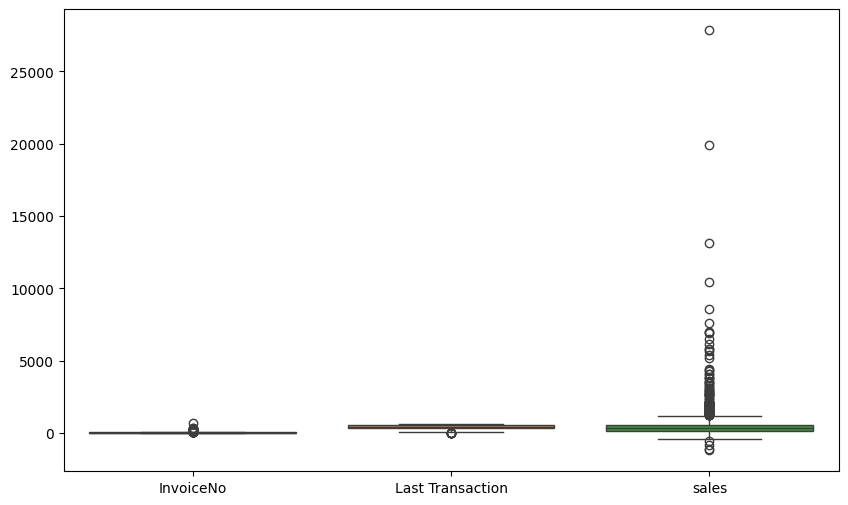

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=new_df[['InvoiceNo',"Last Transaction",'sales']])
plt.show()

IQR for outliers

In [31]:
IQR=new_df['sales'].quantile(0.75)-new_df['sales'].quantile(0.25)
lower_lim=new_df['sales'].quantile(0.25)-(IQR*1.5)
upper_lim=new_df['sales'].quantile(0.75)+(IQR*1.5)
new_df_iqr=new_df[(new_df['sales']>=lower_lim)&(new_df['sales']<=upper_lim)]#new dataframe creATED by eliminating outliers
new_df_iqr.shape

(920, 5)

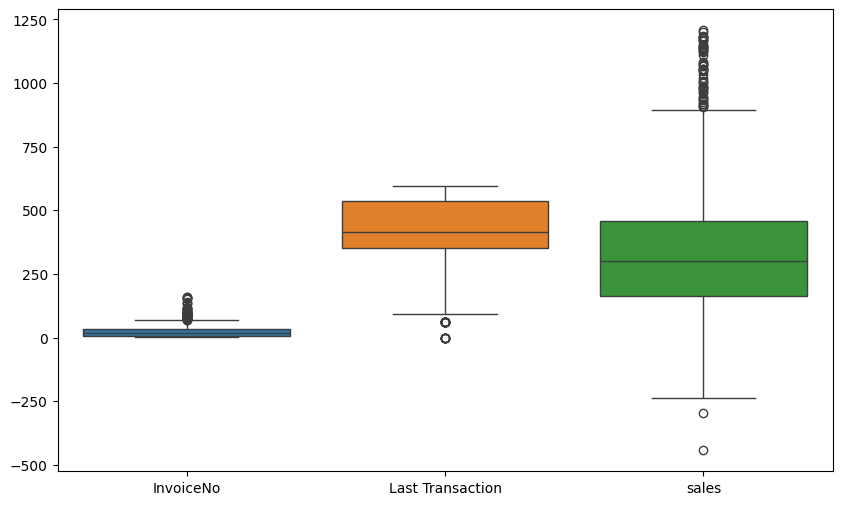

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=new_df_iqr[['InvoiceNo',"Last Transaction",'sales']])
plt.show()

In [33]:
new_df_iqr.reset_index(drop=True, inplace=True)
new_df_iqr

,CustomerID,Country,Last Transaction,InvoiceNo,sales
0,12347.0,Iceland,415.0,31,711.79
1,12348.0,Finland,NaN,17,892.80
2,12377.0,Switzerland,NaN,43,1001.52
3,12383.0,Belgium,NaN,37,600.72
4,12386.0,Australia,385.0,10,401.90
...,...,...,...,...,...
915,18256.0,United Kingdom,NaN,4,-50.10
916,18259.0,United Kingdom,384.0,7,376.30
917,18260.0,United Kingdom,NaN,11,230.70
918,18269.0,United Kingdom,384.0,8,138.90


visualization of correlation matrix using heatmap

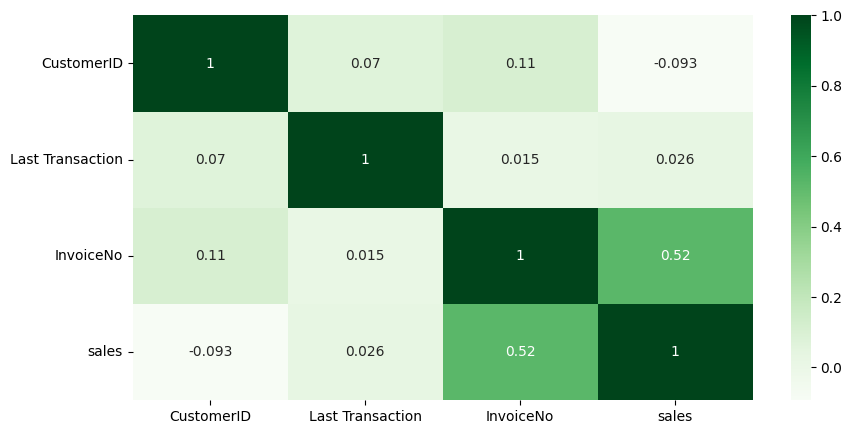

In [34]:
plt.figure(figsize=(10,5))
# Select only numeric columns for correlation calculation
numeric_df = new_df_iqr.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(),cmap='Greens',annot=True)
plt.show()

We observe not much highestt correlation coefficient

**Normalization of given dataset using minmax scaler**-----to avoid biasness

can also be done by standard scaler also

In [35]:
from sklearn.preprocessing import MinMaxScaler

filling NA values in last transaction colm before normalizing

In [36]:
# Calculate the median 'Last Transaction'
median_last_transaction = new_df_iqr['Last Transaction'].median()

# Fill missing 'Last Transaction' values with the median
new_df_iqr['Last Transaction'].fillna(median_last_transaction, inplace=True)

# ... (rest of your code for scaling and further processing)

<ipython-input-36-fa55ca0514c2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_iqr['Last Transaction'].fillna(median_last_transaction, inplace=True)
<ipython-input-36-fa55ca0514c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_iqr['Last Transaction'].fillna(median_last_transaction, inplace=True)


In [37]:
new2_df=new_df_iqr[['Last Transaction','InvoiceNo','sales']]
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(new2_df)
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=['Last Transaction','InvoiceNo','sales']
scaled_df['Country']=new_df_iqr['Country']
scaled_df


,Last Transaction,InvoiceNo,sales,Country
0,0.695142,0.18750,0.699862,Iceland
1,0.696817,0.10000,0.809611,Finland
2,0.696817,0.26250,0.875530,Switzerland
3,0.696817,0.22500,0.632519,Belgium
4,0.644891,0.05625,0.511972,Australia
...,...,...,...,...
915,0.696817,0.01875,0.237918,United Kingdom
916,0.643216,0.03750,0.496450,United Kingdom
917,0.696817,0.06250,0.408171,United Kingdom
918,0.643216,0.04375,0.352511,United Kingdom


In [38]:
scaled_df.isnull().sum()

,0
Last Transaction,0
InvoiceNo,0
sales,0
Country,0


**K means clustering -plot the graph using elbow method**

In [39]:
df_k=scaled_df.drop(columns=['Country'],axis=1)

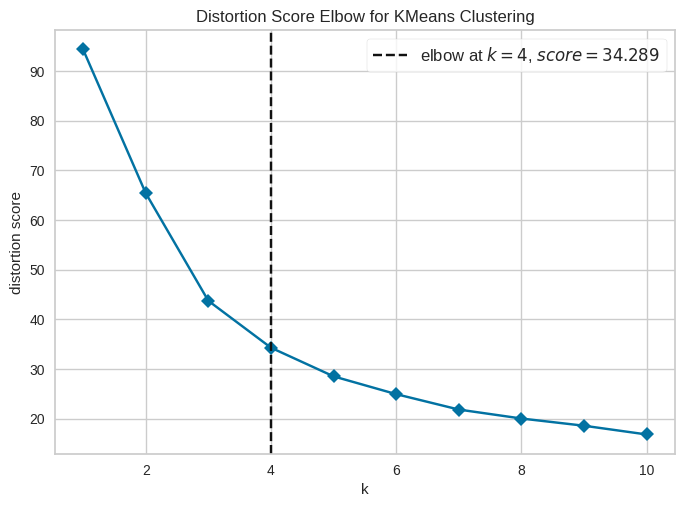

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
#elbow method for k Means
#import elbow visualizer
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
#k is range of number of clusters
Visualizer=KElbowVisualizer(model,k=(1,11),timings=False)
Visualizer.fit(df_k)
Visualizer.show()

In [41]:
km=KMeans(n_clusters=4)#model
y_predicted=km.fit_predict(df_k)
df_k['clusters']=y_predicted
df_k

,Last Transaction,InvoiceNo,sales,clusters
0,0.695142,0.18750,0.699862,3
1,0.696817,0.10000,0.809611,3
2,0.696817,0.26250,0.875530,3
3,0.696817,0.22500,0.632519,3
4,0.644891,0.05625,0.511972,0
...,...,...,...,...
915,0.696817,0.01875,0.237918,0
916,0.643216,0.03750,0.496450,0
917,0.696817,0.06250,0.408171,0
918,0.643216,0.04375,0.352511,0


In [42]:
#3 clusters==>3 centroids

In [43]:
km.cluster_centers_#==>4 clusters with 3 axis(3 features)...i.e country removed

array([[0.66607163, 0.09522587, 0.40708559],
       [0.15824441, 0.14936798, 0.4966495 ],
       [0.95758873, 0.09970414, 0.43314258],
       [0.75566403, 0.35617857, 0.7123988 ]])

**lesser dimension of features--->better model performance**

*Model evaluation* **by SILHOUTTE SCORE**

In [44]:
from sklearn.metrics import silhouette_score,silhouette_samples
score=silhouette_score(df_k,km.labels_,metric='manhattan')
print('Silhouette Score: %.3f'%score)
score

Silhouette Score: 0.810


np.float64(0.809704081857107)

In [45]:
km.labels_


array([3, 3, 3, 3, 0, 3, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       3, 0, 2, 0, 1, 1, 0, 2, 0, 3, 0, 2, 0, 0, 0, 3, 2, 0, 3, 0, 2, 3,
       0, 2, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 3, 3,
       2, 0, 3, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 1, 0, 2, 3, 0, 0,
       0, 0, 2, 0, 0, 3, 0, 0, 2, 3, 2, 3, 0, 3, 1, 3, 0, 0, 1, 3, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 3, 1, 0, 0, 3, 1, 1, 0, 3, 0, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 3, 0, 1, 2, 0, 2, 1, 0, 0, 3, 0, 1, 0, 3, 1,
       2, 1, 3, 3, 3, 0, 0, 2, 3, 0, 0, 0, 2, 0, 0, 1, 3, 0, 3, 0, 1, 3,
       0, 0, 1, 0, 0, 1, 0, 1, 2, 3, 2, 2, 1, 3, 3, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 3, 3, 3, 0, 2, 3, 3, 2, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0,
       2, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 3, 0,
       0, 3, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0,

In [50]:
from sklearn.cluster import AgglomerativeClustering
hierachial=AgglomerativeClustering(n_clusters=4)
y_predicted_herachial=hierachial.fit_predict(df_k)
df_k['cluster hierarchial']=y_predicted_herachial
df_k.head(30)

,Last Transaction,InvoiceNo,sales,clusters,cluster hierarchial
0,0.695142,0.18750,0.699862,3,0
1,0.696817,0.10000,0.809611,3,0
2,0.696817,0.26250,0.875530,3,0
3,0.696817,0.22500,0.632519,3,0
4,0.644891,0.05625,0.511972,0,2
5,0.899497,0.19375,0.678751,3,0
6,0.152429,0.15000,0.526129,1,1
7,0.152429,0.08125,0.425566,1,1
8,0.696817,0.09375,0.412554,0,2
9,0.901173,0.07500,0.417781,2,3


**silhoutte score of hierarchial clustering**

In [62]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Create an AgglomerativeClustering model
hierarchical = AgglomerativeClustering(n_clusters=4)

# Fit the model to the data
y_predicted_hierarchical = hierarchical.fit_predict(df_k)

# Calculate the silhouette score
score_hierarchial = silhouette_score(df_k, hierarchical.labels_, metric='manhattan')

# Print the silhouette score
print('Silhouette Score for hierarchial clustering : %.3f' % score_hierarchial)

Silhouette Score for hierarchial clustering : 0.911


**Clustering by DBSCAN**

In [63]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.2,min_samples=4)
y_predicted_dbscan=dbscan.fit_predict(df_k)
df_k['cluster_by_dbscan']=y_predicted_dbscan
df_k.head(30)

,Last Transaction,InvoiceNo,sales,clusters,cluster hierarchial,cluster_by_dbscan
0,0.695142,0.18750,0.699862,3,0,0
1,0.696817,0.10000,0.809611,3,0,0
2,0.696817,0.26250,0.875530,3,0,0
3,0.696817,0.22500,0.632519,3,0,0
4,0.644891,0.05625,0.511972,0,2,1
5,0.899497,0.19375,0.678751,3,0,0
6,0.152429,0.15000,0.526129,1,1,2
7,0.152429,0.08125,0.425566,1,1,2
8,0.696817,0.09375,0.412554,0,2,1
9,0.901173,0.07500,0.417781,2,3,3


In [64]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
score_dbscan= silhouette_score(df_k, dbscan.labels_, metric='manhattan')
# Print the silhouette score
print('Silhouette Score for dbcsan clustering: %.3f' % score_dbscan)

Silhouette Score for dbcsan clustering: 0.902
